## demo 1-1 人脸识别

In [1]:
import cv2

In [2]:
face_cascade = cv2.CascadeClassifier('/home/conda/anaconda3/lib/python3.8/site-packages/cv2/data/haarcascade_frontalface_default.xml')

In [3]:
img = cv2.imread('./face.jpg')

In [4]:
type(img)

numpy.ndarray

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [6]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x, y, w, h) in faces:
    img = cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

In [7]:
from matplotlib import pyplot as plt

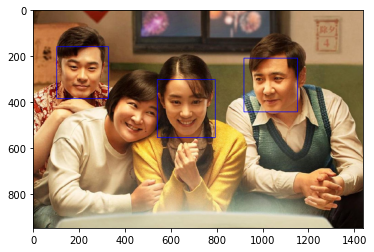

In [8]:
plt.imshow(img[:, :, [2, 1, 0]])
plt.show()

## demo 1-2 人脸定位

In [9]:
import face_recognition

In [10]:
image = face_recognition.load_image_file("./face.jpg")
face_locations_noCNN=face_recognition.face_locations(image)

In [11]:
face_locations_noCNN

[(217, 1133, 440, 910),
 (345, 758, 531, 572),
 (201, 304, 387, 118),
 (387, 551, 573, 366)]

In [12]:
len(face_locations_noCNN)

4

In [13]:
org = cv2.imread("./face.jpg")

In [14]:
for i in range(0, len(face_locations_noCNN)):
    top = face_locations_noCNN[i][0]
    right = face_locations_noCNN[i][1]
    bottom = face_locations_noCNN[i][2]
    left = face_locations_noCNN[i][3]

    start = (left, top)
    end = (right, bottom)

    color = (0,255,255)
    thickness = 2
    cv2.rectangle(org, start, end, color, thickness)

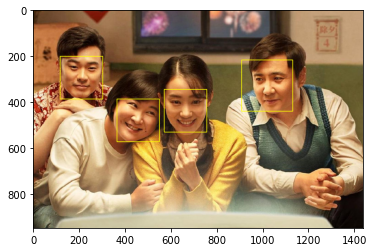

In [15]:
plt.imshow(org[:, :, [2, 1, 0]])
plt.show()

## demo2 人脸定位

In [16]:
import dlib

In [21]:
img = cv2.imread('./face.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [22]:
#人脸分类器
detector = dlib.get_frontal_face_detector()

In [23]:
predictor = dlib.shape_predictor("./shape_predictor_68_face_landmarks.dat")

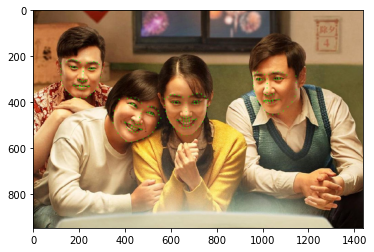

In [26]:
dets = detector(gray, 1)
for face in dets:
    shape = predictor(img, face)  # 寻找人脸的68个标定点
    # 遍历所有点，打印出其坐标，并圈出来
    for pt in shape.parts():
        pt_pos = (pt.x, pt.y)
        cv2.circle(img, pt_pos, 2, (0, 255, 0), 1)
    plt.imshow(img[:, :, [2, 1, 0]])